Nama : Fitrie Ratnasari \
email: ratnasari.fitrie@gmail.com 

In [35]:
# Import Library yg dibutuhkan

import csv
from urllib.request import urlopen, Request
import requests
from bs4 import BeautifulSoup as bs 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alamat = "https://pokemondb.net/pokedex/all"
safeAdd = Request(alamat, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(safeAdd)
data = bs(html, 'html.parser')

In [36]:
# Menginisiasi table dan stop function yg akan diambil datanya

table = data.find("table", {"id":"pokedex"})
rows = data.findAll("tr")

row_data = []
for row in rows:
    pass

    if row.contents[1].get_text() == "599": #stop function
        break
        
    for item in row.findAll(["th","td"]): #gathering functionpass
        pass

In [37]:
#Mendapatkan data dari fungsi yg telah diinisiasi

row_data = []
for row in rows:
    cell_data = []

    if row.contents[1].get_text() == "599": #stop function
        break


    for item in row.findAll(["th","td"]): #gathering function
        cell_data.append(item.get_text())
    row_data.append(cell_data)

In [38]:
# Menyimpan dataframe ke dalam csv. format
df = pd.DataFrame(row_data)
df.columns = df.iloc[0]

df.to_csv('data_pokemon.csv',index=False, header=None)


In [40]:
data = pd.read_csv('data_pokemon.csv')
data = df.iloc[:599]
data

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
...,...,...,...,...,...,...,...,...,...,...
594,496,Servine,Grass,413,60,60,75,60,75,83
595,497,Serperior,Grass,528,75,75,95,75,95,113
596,498,Tepig,Fire,308,65,63,45,45,45,45
597,499,Pignite,Fire Fighting,418,90,93,55,70,55,55


In [41]:
#Memilih 2 attributes sebagai features untuk Unsupervised Learning
field = ['Attack','Defense']
data = pd.read_csv('data_pokemon.csv', usecols=field)
data.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [42]:
data.tail()

,Attack,Defense
698,75,80
699,47,50
700,77,60
701,50,91
702,94,131


In [43]:
data.duplicated().sum()

227

In [44]:
data.shape

(703, 2)

In [45]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(476, 2)

## Exploratory Data Analysis

1. Korelasi dari tiap features

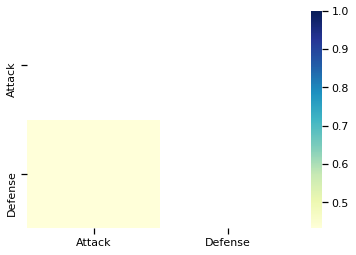

In [46]:
import seaborn as sns
corrmat = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(6, 4))

matrix = np.triu(corrmat)
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, mask=matrix, annot = False)

Dengan menggunakan Pearson Correlation, dapat disimpulkan bahwa 'Attack' dan 'Defense' cukup memiliki korelasi yang dapat mempengaruhi satu sama lain, dibuktikan dengan corr=0.55

2. Pairplot untuk mengetahui visualisasi dari korelasi data kedua features

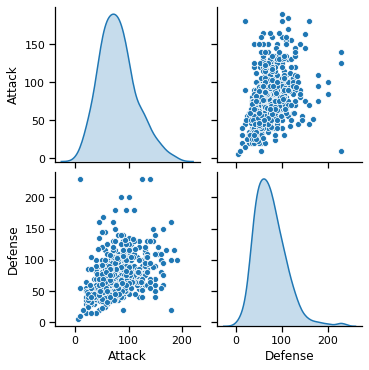

In [47]:
sns.set_context('notebook')

sns.pairplot(data, diag_kind='kde');


Visualisasi tersebut semakin menegaskan bahwa hubungan kedua fitur adalah positif.

3. Distribusi Features 'Attack' dan 'Defense'

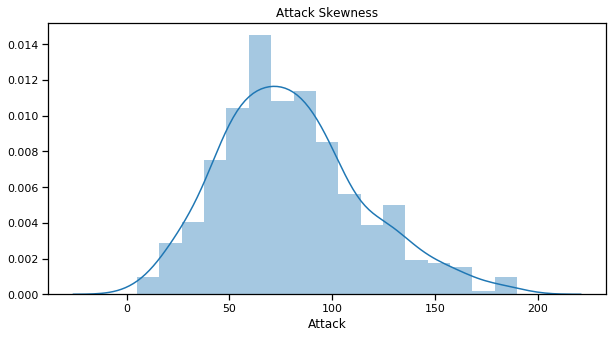

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.distplot(data['Attack'])
plt.title('Attack Skewness')
plt.show()

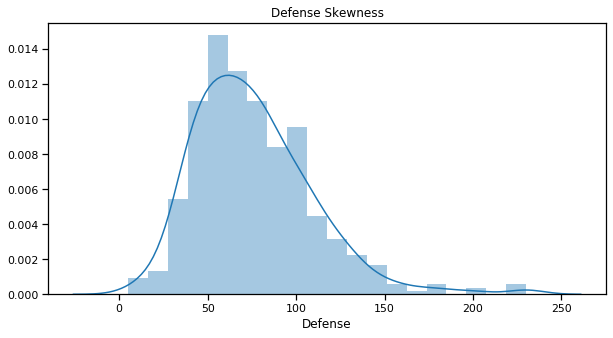

In [49]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.distplot(data['Defense'])
plt.title('Defense Skewness')
plt.show()

In [50]:
data.skew()

Attack     0.558146
Defense    1.175031
dtype: float64

Hal ini dapat diartikan bahwa atribut 'Defense' memiliki kemiringan kanan (right skewed), berbeda dengan atribut 'Attack' yang terdistribusi normal atau Gaussian.

## Data Preprocessing dengan Transformasi Logaritmik

In [51]:
data['Log-Attack'] = np.log1p(data['Attack'])
data['Log-Defense'] = np.log1p(data['Defense'])

In [52]:
data

,Attack,Defense,Log-Attack,Log-Defense
0,49,49,3.912023,3.912023
1,62,63,4.143135,4.158883
2,82,83,4.418841,4.430817
3,100,123,4.615121,4.820282
4,52,43,3.970292,3.784190
...,...,...,...,...
693,135,105,4.912655,4.663439
699,47,50,3.871201,3.931826
700,77,60,4.356709,4.110874
701,50,91,3.931826,4.521789


In [53]:
log_data = data.iloc[:, 2:4]
log_array = np.array(log_data)
print (log_array)

[[3.91202301 3.91202301]
 [4.14313473 4.15888308]
 [4.41884061 4.4308168 ]
 [4.61512052 4.82028157]
 [3.97029191 3.78418963]
 [4.17438727 4.07753744]
 [4.44265126 4.36944785]
 [4.87519732 4.71849887]
 [4.65396035 4.36944785]
 [3.8918203  4.18965474]
 [4.15888308 4.39444915]
 [4.4308168  4.61512052]
 [4.6443909  4.79579055]
 [3.4339872  3.58351894]
 [3.04452244 4.02535169]
 [3.8286414  3.93182563]
 [3.58351894 3.4339872 ]
 [3.25809654 3.93182563]
 [4.51085951 3.71357207]
 [5.01727984 3.71357207]
 [3.8286414  3.71357207]
 [4.11087386 4.02535169]
 [4.39444915 4.33073334]
 [4.39444915 4.39444915]
 [4.04305127 3.58351894]
 [4.40671925 4.11087386]
 [4.27666612 4.26267988]
 [4.11087386 3.4339872 ]
 [4.51085951 4.18965474]
 [4.11087386 3.80666249]
 [4.56434819 4.24849524]
 [4.02535169 3.71357207]
 [4.39444915 3.93182563]
 [4.51085951 4.02535169]
 [4.4543473  3.93182563]
 [4.33073334 4.4543473 ]
 [4.33073334 4.51085951]
 [4.61512052 4.7095302 ]
 [4.61512052 4.79579055]
 [3.87120101 3.97029191]


In [54]:
log_data

,Log-Attack,Log-Defense
0,3.912023,3.912023
1,4.143135,4.158883
2,4.418841,4.430817
3,4.615121,4.820282
4,3.970292,3.784190
...,...,...
693,4.912655,4.663439
699,3.871201,3.931826
700,4.356709,4.110874
701,3.931826,4.521789


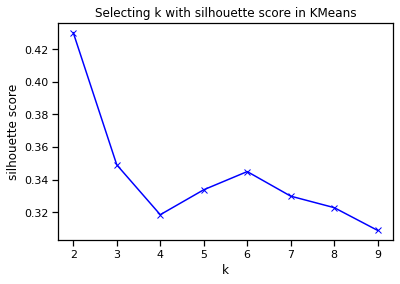

In [55]:
# MENENTUKAN JUMLAH CLUSTER (K) Menggunakan Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

meanDistortions=[]

for k in range(2, 10):
    kmeans_model=KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(log_data)
    prediction=kmeans_model.labels_
    meanDistortions.append(silhouette_score(log_data, prediction))


plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score in KMeans');

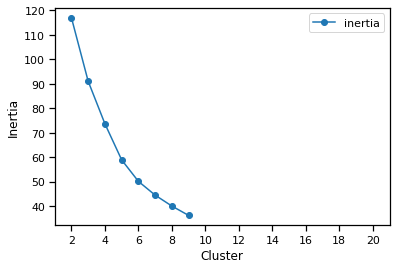

In [56]:
# Menentukan Jumlah Klaster menggunakan Elbow Method 
km_list = list()

for clust in range(2,10):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(log_data)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(1,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

**Dengan menggunakan Metode Elbow hasil yang didapatkan tidak dapat diambil kesimpulan jumlah klaster terbaik, sehingga digunakan Metode Silhouette Score yang mana didapatkan k=2 adalah klaster optimum.**

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=200)
kmeans.fit(log_array)
data['kluster'] = kmeans.labels_
print(data.head())

   Attack  Defense  Log-Attack  Log-Defense  kluster
0      49       49    3.912023     3.912023        1
1      62       63    4.143135     4.158883        1
2      82       83    4.418841     4.430817        0
3     100      123    4.615121     4.820282        0
4      52       43    3.970292     3.784190        1


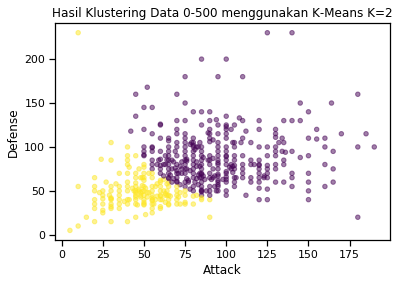

In [62]:
plt.scatter(data.Attack, data.Defense, s = 20, c = data.kluster, marker = "o", alpha = 0.5, cmap='viridis')
plt.title("Hasil Klustering Data 0-500 menggunakan K-Means K=2")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

In [59]:
#Menyimpan data final dengan klaster ke csv untuk cek klasifikasi data selanjutnya
data.to_csv('pokemon_XTrain.csv', header=True, index=None)

In [60]:
df = pd.read_csv('pokemon_XTrain.csv')

In [61]:
df

,Attack,Defense,Log-Attack,Log-Defense,kluster
0,49,49,3.912023,3.912023,1
1,62,63,4.143135,4.158883,1
2,82,83,4.418841,4.430817,0
3,100,123,4.615121,4.820282,0
4,52,43,3.970292,3.784190,1
...,...,...,...,...,...
471,135,105,4.912655,4.663439,0
472,47,50,3.871201,3.931826,1
473,77,60,4.356709,4.110874,0
474,50,91,3.931826,4.521789,0
